In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.tree import plot_tree as tree_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score

In [11]:
df = pd.read_csv('data_set.txt', delimiter='\t')
# Sizin vermiş oldugunuz veri setini projeme dahil ediyorum.
# Verilen data setine sütun başlıkları ekliyorum.

df.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "AGE", "Outcome"]

print("DataFrame:")
print(df)
df = df.astype(float)

# Özellikleri hedef değişkenden ayırma
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Verinin 70%'inin train 30%'unun da test etmek amacıyla ayrılması
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4242)

# Standart Scaler Fonksiyonu Yardımıyla Normalizasyon İşlemi
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       85             66             29        0  26.6   
1              8      183             64              0        0  23.3   
2              1       89             66             23       94  28.1   
3              0      137             40             35      168  43.1   
4              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
762           10      101             76             48      180  32.9   
763            2      122             70             27        0  36.8   
764            5      121             72             23      112  26.2   
765            1      126             60              0        0  30.1   
766            1       93             70             31        0  30.4   

     DiabetesPedigree  AGE  Outcome  
0               0.351   31        0  
1               0.672   

In [12]:
# PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

# LDA
lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], np.unique(y).size - 1))
X_lda = lda.fit_transform(X, y)

print("PCA için en ayırt edici öznitelikler: \n", pd.DataFrame(pca.components_, columns=X.columns))
print("")
print("LDA için en ayırt edici öznitelikler: \n", pd.DataFrame(lda.scalings_, columns=['Outcome']))

PCA için en ayırt edici öznitelikler: 
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.351877  0.194832       0.089495       0.460860  0.318572  0.532466   
1     0.631056  0.370862       0.238162       0.047472  0.081563  0.291656   

   DiabetesPedigree       AGE  
0          0.418932 -0.239396  
1          0.132624  0.544014  

LDA için en ayırt edici öznitelikler: 
     Outcome
0  0.094139
1  0.026956
2 -0.010591
3  0.000443
4 -0.000791
5  0.060571
6  0.670223
7  0.011694


In [13]:
# Çoklu Doğrusal Regresyon analizi
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_coef = linear_reg_model.coef_

# Çoklu Doğrusal Regresyon performans metrikleri
def calculate_regression_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2
linear_reg_r2 = calculate_regression_metrics(
                                        y_test,
                                        linear_reg_model.predict(X_test)
                                    )

# Multinominal Lojistik Regresyon analizi
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg_model.fit(X_train, y_train)
logistic_reg_coef = logistic_reg_model.coef_

# Multinominal Lojistik Regresyon performans metrikleri
logistic_predictions = logistic_reg_model.predict(X_test)
logistic_reg_acc = accuracy_score(y_test,logistic_predictions)
logistic_reg_report = classification_report(y_test, logistic_predictions)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Sonuçları raporlama
print("\nÇoklu Doğrusal Regresyon Katsayıları: ", linear_reg_coef)
print("Çoklu Doğrusal Regresyon Performansı:")
print("R-kare (R^2) Değeri:", linear_reg_r2)

print("\nMultinominal Lojistik Regresyon Performansı:")
print("Accuracy:", logistic_reg_acc)
print("Classification Report:")
print(logistic_reg_report)
print("Confusion Matrix:")
print(logistic_reg_conf_matrix)


Çoklu Doğrusal Regresyon Katsayıları:  [ 0.08195858  0.16765592 -0.0461207   0.0033967  -0.00878275  0.11691504
  0.041894    0.03188519]
Çoklu Doğrusal Regresyon Performansı:
R-kare (R^2) Değeri: 0.31838710728249353

Multinominal Lojistik Regresyon Performansı:
Accuracy: 0.7922077922077922
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       152
         1.0       0.72      0.65      0.68        79

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231

Confusion Matrix:
[[132  20]
 [ 28  51]]


In [14]:
# Çoklu Doğrusal Regresyon analizi
linear_reg_model.fit(X_pca_train, y_train)
linear_reg_coef = linear_reg_model.coef_

# Çoklu Doğrusal Regresyon performans metrikleri
linear_reg_r2 = calculate_regression_metrics(
                                        y_test,
                                        linear_reg_model.predict(X_pca_test)
                                    )

# Multinominal Lojistik Regresyon analizi
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg_model.fit(X_pca_train, y_train)
logistic_reg_coef = logistic_reg_model.coef_

# Multinominal Lojistik Regresyon performans metrikleri
logistic_predictions = logistic_reg_model.predict(X_pca_test)
logistic_reg_acc = accuracy_score(y_test,logistic_predictions)
logistic_reg_report = classification_report(y_test, logistic_predictions)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Sonuçları raporlama
print("\nÇoklu Doğrusal Regresyon Katsayıları: ", linear_reg_coef)
print("Çoklu Doğrusal Regresyon Performansı:")
print("R-kare (R^2) Değeri:", linear_reg_r2)

print("\nMultinominal Lojistik Regresyon Performansı:")
print("Accuracy:", logistic_reg_acc)
print("Classification Report:")
print(logistic_reg_report)
print("Confusion Matrix:")
print(logistic_reg_conf_matrix)


Çoklu Doğrusal Regresyon Katsayıları:  [0.13219059 0.06209094]
Çoklu Doğrusal Regresyon Performansı:
R-kare (R^2) Değeri: 0.10488438148168666

Multinominal Lojistik Regresyon Performansı:
Accuracy: 0.7186147186147186
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       152
         1.0       0.64      0.41      0.50        79

    accuracy                           0.72       231
   macro avg       0.69      0.64      0.65       231
weighted avg       0.71      0.72      0.70       231

Confusion Matrix:
[[134  18]
 [ 47  32]]



Karar Ağacı Sınıflandırma Performansı:

------------- Accuracy:  0.7186147186147186  -------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       152
         1.0       0.61      0.48      0.54        79

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

Confusion Matrix:
[[128  24]
 [ 41  38]]


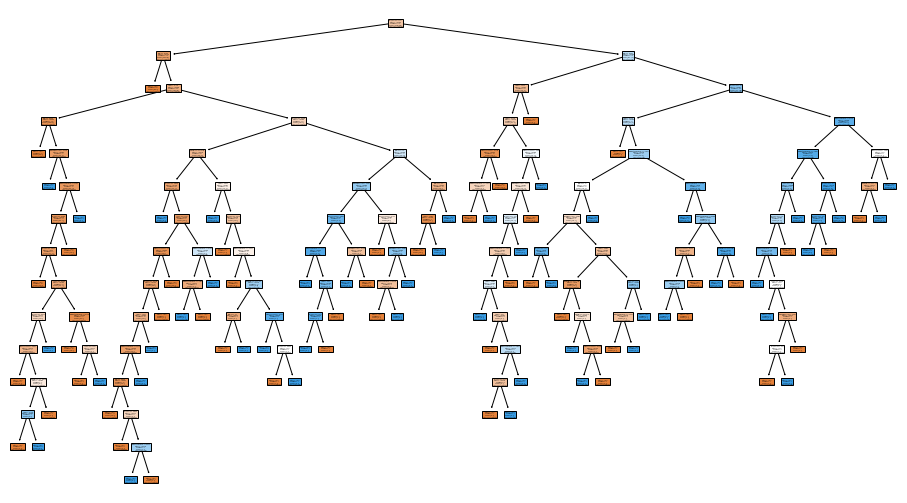

In [15]:
# Karar Ağacı Sınıflandırma performans metrikleri
dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Sonuçları raporlama
print("\nKarar Ağacı Sınıflandırma Performansı:")
print("\n------------- Accuracy: ", dt_acc, " -------------\n")
print("Classification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_conf_matrix)

X_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "AGE"]

pyplot.figure(figsize=(16, 9))
tree_model(dt_model, filled=True, feature_names=X_columns, class_names=["No Diabetes", "Diabetes"])
pyplot.show()

In [ ]:
# Karar Ağacı Sınıflandırma performans metrikleri
dt_model.fit(X_pca_train, y_train)
y_pred_dt = dt_model.predict(X_pca_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Sonuçları raporlama
print("\nKarar Ağacı Sınıflandırma Performansı:")
print("\n------------- Accuracy: ", dt_acc, " -------------\n")
print("Classification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_conf_matrix)

X_columns = ["NTP", "glucoseTT", "DBP", "ST", "SI", "BMI", "DPF", "AGE"]
pyplot.figure(figsize=(16, 9))
tree_model(dt_model, filled=True, feature_names=X_columns, class_names=["No Diabetes", "Diabetes"])
pyplot.show()


Karar Ağacı Sınıflandırma Performansı:

------------- Accuracy:  0.6017316017316018  -------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       152
         1.0       0.42      0.44      0.43        79

    accuracy                           0.60       231
   macro avg       0.56      0.56      0.56       231
weighted avg       0.61      0.60      0.60       231

Confusion Matrix:
[[104  48]
 [ 44  35]]


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_predictions = nb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_predictions)
print("Naive bayes doğruluk oranı:", test_accuracy)

print("\nTest Verisinin Confusion Matrixi\n")
print(confusion_matrix(y_test, y_predictions))
print("\nTest Verisinin Sınıflandırma Raporu\n")
print(classification_report(y_test, y_predictions))


In [ ]:
nb.fit(X_pca_train, y_train)

y_predictions = nb.predict(X_pca_test)

test_accuracy = accuracy_score(y_test, y_predictions)
print("Naive bayes doğruluk oranı:", test_accuracy)


print("\nTest Verisinin Confusion Matrixi\n")
print(confusion_matrix(y_test, y_predictions))
print("\nTest Verisinin Sınıflandırma Raporu\n")
print(classification_report(y_test, y_predictions))